# 이미지 연산 (Image Operation)

- 이미지는 배열(array)로 표현가능하여 여러가지 연산 가능

- 이미지 다운로드 및 업로드

  - tree.jpg
  <img src="사진/tree.jpg" width="400">
  <sub>[이미지 출처] https://pixabay.com/ko/photos/%ED%8A%B8%EB%A6%AC-%EC%82%AC%EB%A7%89-%ED%92%8D%EA%B2%BD-%ED%86%A0%EC%A7%80-%EA%B0%80%EB%AD%84-5507220/</sub>


In [4]:
import cv2
cv2.__version__
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow


In [5]:
up = files.upload()

Saving desert.jpg to desert.jpg


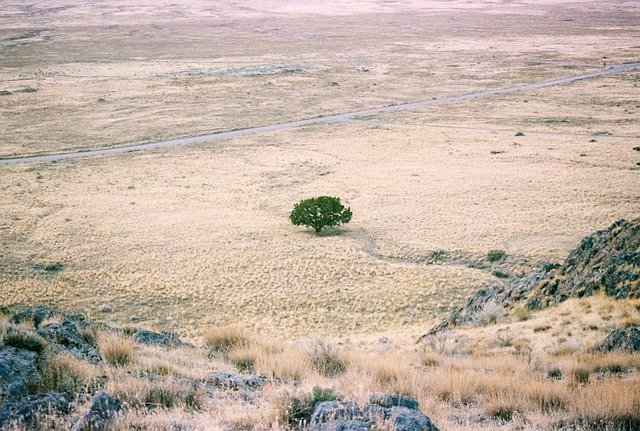

In [8]:
desert = cv2.imread('desert.jpg')
cv2_imshow(desert)

In [18]:
desert.shape

(431, 640, 3)

## Pixel Value

In [9]:
desert = cv2.imread('desert.jpg')
desert[200,300]

array([182, 210, 217], dtype=uint8)

## 값 변경

In [ ]:
desert = cv2.imread('desert.jpg')
import time

## 인덱싱

In [12]:
cv2_imshow((182, 210))

AttributeError: ignored

## 이미지 ROI

- 이미지 작업시에는 특정 pixel단위 보다는 특정 영역단위로 작업을 하게 되는데 이것을 Region of Image(ROI)라고 함
  
- ROI 설정은 Numpy의 indexing 을 사용
  
  - 특정 영역을 copy 할 수도 있음

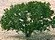

In [21]:
desert = cv2.imread('desert.jpg')
tree = desert[195:235, 290:345]
cv2_imshow(tree)

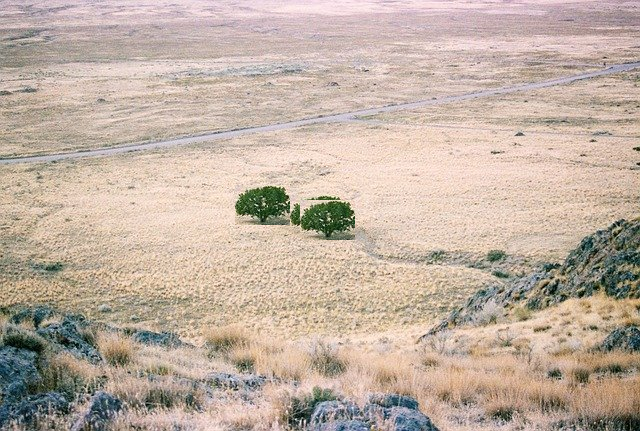

In [24]:
desert[185:225, 235:290] = tree
desert[200:240, 300:355] = tree
cv2_imshow(desert)

## 이미지의 Channels

- B, G, R로 구성된 채널을 분리, 합칠 수 있음

  - `cv2.split()`

  - `cv2.merge()`

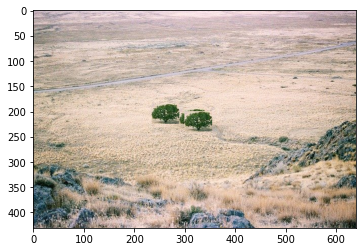

In [26]:
b, g, r = cv2.split(desert)
img = cv2.merge((r, g, b))
plt.imshow(img);

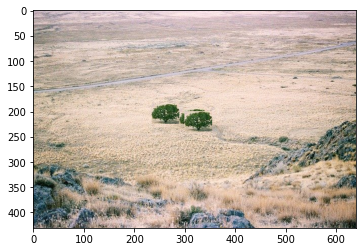

In [27]:
plt.imshow(img);

- `cv2.split()` 함수는 비용이 많이 드는 함수이므로, 가능하다면 **Numpy indexing**을 사용하는 효율적!

- R 채널 0으로 값 변경

In [28]:
r.shape

(431, 640)

- G 채널 255으로 값 변경

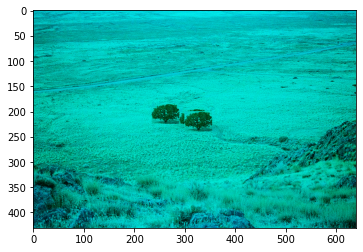

In [29]:
r[:, :] = 0
img = cv2.merge((r,g,b))
plt.imshow(img);

## 이미지 더하기
- `cv2.add()`

- `cv2.addWeighted()`

- `Numpy` 더하기 연산

- (참고) 
  - `cv2.add()` : Saturation 연산 
    - `Saturation` 연산은 한계값을 정하고 그 값을 벗어나는 경우는 모두 특정 값으로 계산하는 방식

    - 이미지에서는 0이하는 모두 0, 255이상은 모두 255로 표현
  
  - `Numpy` : modulo 연산
    - a와 b는 n으로 나눈 나머지 값이 같다라는 의미

    - 이미지에서는 연산의 결과가 256보다 큰 경우는 256으로 나눈 나머지 값으로 결정

In [31]:
x, y = np.uint8([250]), np.uint8([10])

- `cv2.add()` 연산

In [32]:
cv2.add(x,y)

array([[255]], dtype=uint8)

- `Numpy` 연산

In [33]:
x + y    # 표현 범위를 벗어나면 modulo 연산

array([4], dtype=uint8)

- 이미지1(dog1.jpg)

  <img src="https://cdn.pixabay.com/photo/2017/09/25/13/12/dog-2785074_960_720.jpg" width="300">

  <sub>[이미지 출처] https://pixabay.com/ko/photos/%EA%B0%9C-%EC%8A%AC%ED%94%88-%EB%8C%80%EA%B8%B0-%EC%A4%91-%EC%B8%B5-2785074//</sub>

<br>

- 이미지2(dog2.jpg)

  <img src="https://cdn.pixabay.com/photo/2017/09/25/13/14/dog-2785077_960_720.jpg" width="300">

  <sub>[이미지 출처] https://pixabay.com/ko/photos/%EA%B0%9C-%EB%9D%BC%EC%82%AC-%EC%82%AC-apso-%EB%8F%99%EB%AC%BC-2785077/</sub>

In [34]:
up = files.upload()

Saving dog1.jpg to dog1.jpg
Saving dog2.jpg to dog2.jpg


- `cv2.add()` 연산

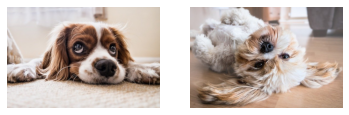

In [36]:
dog1 = cv2.imread('dog1.jpg')
dog2 = cv2.imread('dog2.jpg')

plt.subplot(1,2,1), plt.imshow(dog1[:,:,::-1]), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(dog2[:,:,::-1]), plt.axis('off');

- `Numpy` 연산

In [37]:
dog1.shape, dog2.shape

((426, 640, 3), (426, 640, 3))

In [38]:
img2 = dog1 + dog2

## 비트 연산
- AND, OR, NOT, XOR 연산
  - `bitwise_and` : 둘다 0이 아닌 경우만 값을 통과

  - `bitwise_or` : 둘중 하나가 0이 아니면 값을 통과

  - `bitwise_not` : 해당 값에 대해 부정값을 통과

  - `bitwise_xor` : 두 요소의 논리적 배타값 통과


* 이미지 다운로드

<img src="https://static.vecteezy.com/system/resources/previews/000/440/202/original/star-vector-icon.jpg" width="400">

<sub>출처: https://static.vecteezy.com/system/resources/previews/000/440/202/original/star-vector-icon.jpg</sub>




In [40]:
up = files.upload()

Saving star.jpg to star.jpg


In [42]:
star = cv2.imread('star.jpg')
star.shape

(5120, 5120, 3)

- 이미지의 dtype을 int형으로 변환

In [45]:
black_img = np.zeros(star.shape)
black_img[:, :2500, :] = (255,255,255)
img = black_img.astype('uint8')                             # astype('unit8') 도 가능하나 astype(unit8)은 불가

In [44]:
img.dtype

dtype('uint8')

### bitwise_and 연산

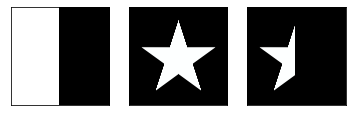

In [48]:
result = cv2.bitwise_and(img, star)
plt.subplot(131), plt.imshow(img), plt.xticks([]), plt.yticks([]);
plt.subplot(132), plt.imshow(star), plt.xticks([]), plt.yticks([]);
plt.subplot(133), plt.imshow(result), plt.xticks([]), plt.yticks([]);

### bitwise_or 연산

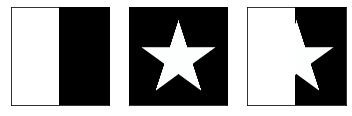

In [49]:
result = cv2.bitwise_or(img, star)
plt.subplot(131), plt.imshow(img), plt.xticks([]), plt.yticks([]);
plt.subplot(132), plt.imshow(star), plt.xticks([]), plt.yticks([]);
plt.subplot(133), plt.imshow(result), plt.xticks([]), plt.yticks([]);

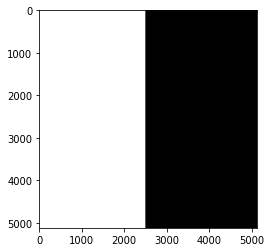

In [50]:
plt.imshow(img)

### bitwise_not 연산

In [38]:
result = cv2.bitwise_not(star)

### bitwise_xor 연산

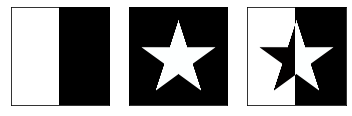

In [52]:
result = cv2.bitwise_xor(img, star)
plt.subplot(131), plt.imshow(img), plt.xticks([]), plt.yticks([]);
plt.subplot(132), plt.imshow(star), plt.xticks([]), plt.yticks([]);
plt.subplot(133), plt.imshow(result), plt.xticks([]), plt.yticks([]);

### 비트 연산 예시 - lenna 이미지에 OpenCV 로고 넣기


- 이미지 (OpenCV logo)
  - https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F2361FF4A586B8FFE1A

  <img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F2361FF4A586B8FFE1A" width="300">

In [54]:
up = files.upload()

Saving Lenna.png to Lenna (1).png
Saving opencv.png to opencv.png


In [55]:
lenna = cv2.imread('Lenna.png')
opencv = cv2.imread('opencv.png')
lenna.shape, opencv.shape

((512, 512, 3), (378, 428, 3))

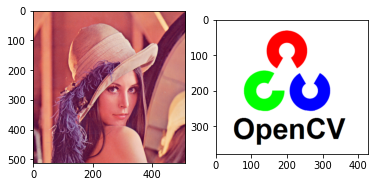

In [56]:
plt.subplot(121), plt.imshow(lenna[:,:,::-1])
plt.subplot(122), plt.imshow(opencv[:,:,::-1]);

- 삽입할 이미지의 row, col, channel정보

- 대상 이미지에서 삽입할 이미지의 영역을 추출

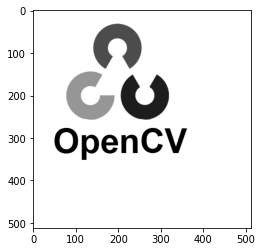

In [59]:
logo_gray = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
plt.imshow(logo_gray, cmap='gray');

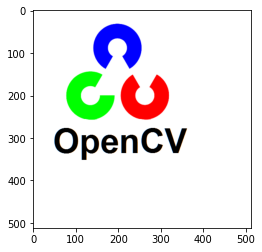

In [58]:
logo = np.ones(lenna.shape, dtype=np.uint8) * 255
logo[:378, :428] = opencv
plt.imshow(logo);

- mask를 만들기 위해서 logo 이미지를 gray scale로 변경후 binary image로 전환

- mask는 logo부분이 흰색(255), 바탕은 검은색(0)

- mask_inv는 logo부분이 검은색(0), 바탕은 흰색(255)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1353a4c290>,
 Text(0.5, 1.0, 'mask_inv'))

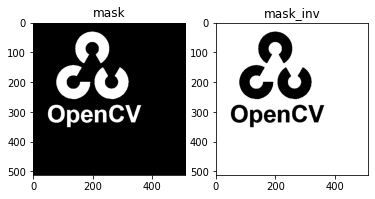

In [60]:
_, mask = cv2.threshold(logo_gray, 200,255, cv2.THRESH_BINARY_INV)
mask_inv = cv2.bitwise_not(mask)
plt.subplot(121), plt.imshow(mask, cmap='gray'), plt.title('mask')
plt.subplot(122), plt.imshow(mask_inv, cmap='gray'), plt.title('mask_inv')

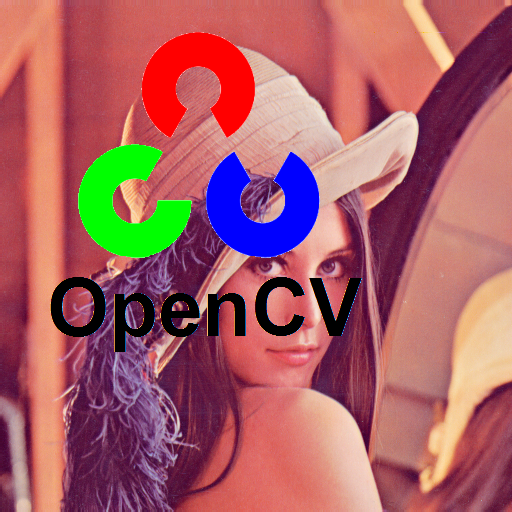

In [67]:
img_fg = cv2.bitwise_and(logo, logo, mask=mask)
img_bg = cv2.bitwise_and(lenna, lenna, mask=mask_inv)
dst = cv2.add(img_fg, img_bg)
cv2_imshow(dst)


In [66]:
cv2_imshow(logo, lenna)

TypeError: ignored

## Image Blending
- `cv2.addWeighted()` 사용하여 두 이미지를 bleding 할 수 있음

- blending 하려는 두 이미지의 사이즈가 같아야함

- [Simple Formula]  
  # $\quad g(x) = (1 - \alpha) f_0(x) + \alpha f_1(x)$

  <br>

  - $\beta = 1 - \alpha$

  -  $\alpha, \beta $ 의 값을 통해 어떤 이미지를 더 강하게 드러내고, 어떤 이미지를 더 약하게 드러낼지 결정

  - $\gamma$ 추가 가능 (optional)


- do-not-copy.jpg
  
  <img src="https://mdxenglish.files.wordpress.com/2014/08/do-not-copy.jpg" width="400">

  <sub>[이미지 출처] https://mdxenglish.com/do-not-copy-2/</sub>

- fashion.jpg

  <img src="https://cdn.pixabay.com/photo/2020/06/20/12/55/fashion-5320934_960_720.jpg">

  <sub>[이미지 출처] https://pixabay.com/illustrations/fashion-moda-girl-shoes-model-5320934/</sub>

In [68]:
up = files.upload()


Saving DoNotCopy.png to DoNotCopy.png
Saving fashion.jpg to fashion.jpg


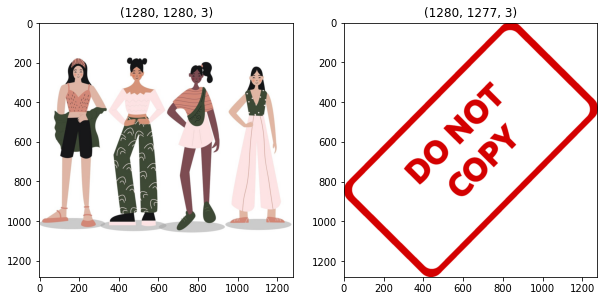

In [69]:
img1 = cv2.imread('fashion.jpg')[:,:,::-1]
img2 = cv2.imread('DoNotCopy.png')[:,:,::-1]
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(img1), plt.title(img1.shape)
plt.subplot(122), plt.imshow(img2), plt.title(img2.shape);

In [72]:
img3 = np.ones(img1.shape, np.uint8) * 255
img3[:,:1277] = img2
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

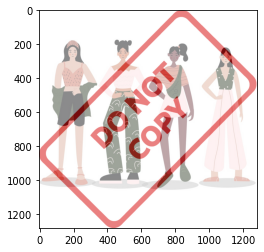

In [73]:
blended = cv2.addWeighted(src1=img1, alpha=0.5, src2=img3, beta=0.5, gamma=0)
plt.imshow(blended);

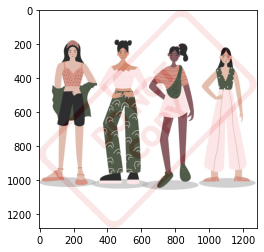

In [74]:
# 워터마크
blended = cv2.addWeighted(img1, 0.9, img3, 0.1, 0)
plt.imshow(blended);